In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import time



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.layers as tfl

In [2]:
training_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [3]:
X_train = training_data.drop(labels = ["label"],axis = 1) 
Y_train = training_data["label"]

In [4]:
X_test = test_data.drop(labels = ["label"],axis = 1)
Y_test = test_data["label"]

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
from sklearn.naive_bayes import GaussianNB
start = time.time()

model = GaussianNB()

reg = model.fit(X_train,Y_train)
stop1 = time.time()


Y_pred = model.predict(X_test)

stop2 = time.time()
apprentissage_NB = round(stop1-start,3)
prediction_NB = round(stop2-start,3)
print(f"Temps d'apprentissage : {apprentissage_NB} s")
print(f"Temps d'apprentissage+prediction : {prediction_NB} s")

Temps d'apprentissage : 0.528 s
Temps d'apprentissage+prediction : 1.769 s


In [124]:
def ajout_image_x(liste):
    from PIL import Image
    from matplotlib.offsetbox import OffsetImage,AnnotationBbox
    place=0
    xy = [0.0, 0.0]
    for i in liste :
#         print(i)
#         print(place)
        img = Image.open(f'C:/Users/Thibaut.GRILLET/Documents/GitHub/ProjetIA/Dev_tib/photos_asl/asl_alphabet_test_perso/{i}_test.jpg')
        img = img.resize((28,28))
        imagebox = OffsetImage(img, zoom=0.8)
        ab = AnnotationBbox(imagebox, xy,
                    xybox=(place, 24.),
                    pad=0.5,frameon=False)
        ax.add_artist(ab)  
        place=place+1
def ajout_image_y(liste):
    from PIL import Image
    from matplotlib.offsetbox import OffsetImage,AnnotationBbox
    place=0
    xy = [0.0, 0.0]
    for i in liste :
#         print(i)
#         print(place)
        img = Image.open(f'C:/Users/Thibaut.GRILLET/Documents/GitHub/ProjetIA/Dev_tib/photos_asl/asl_alphabet_test_perso/{i}_test.jpg')
        img = img.resize((28,28))
        imagebox = OffsetImage(img, zoom=0.8)
        ab = AnnotationBbox(imagebox, xy,
                    xybox=(-1,place),
                    pad=0.5,frameon=False)
        ax.add_artist(ab)  
        place=place+1

    
ajout_image_x(ASL_ticks)

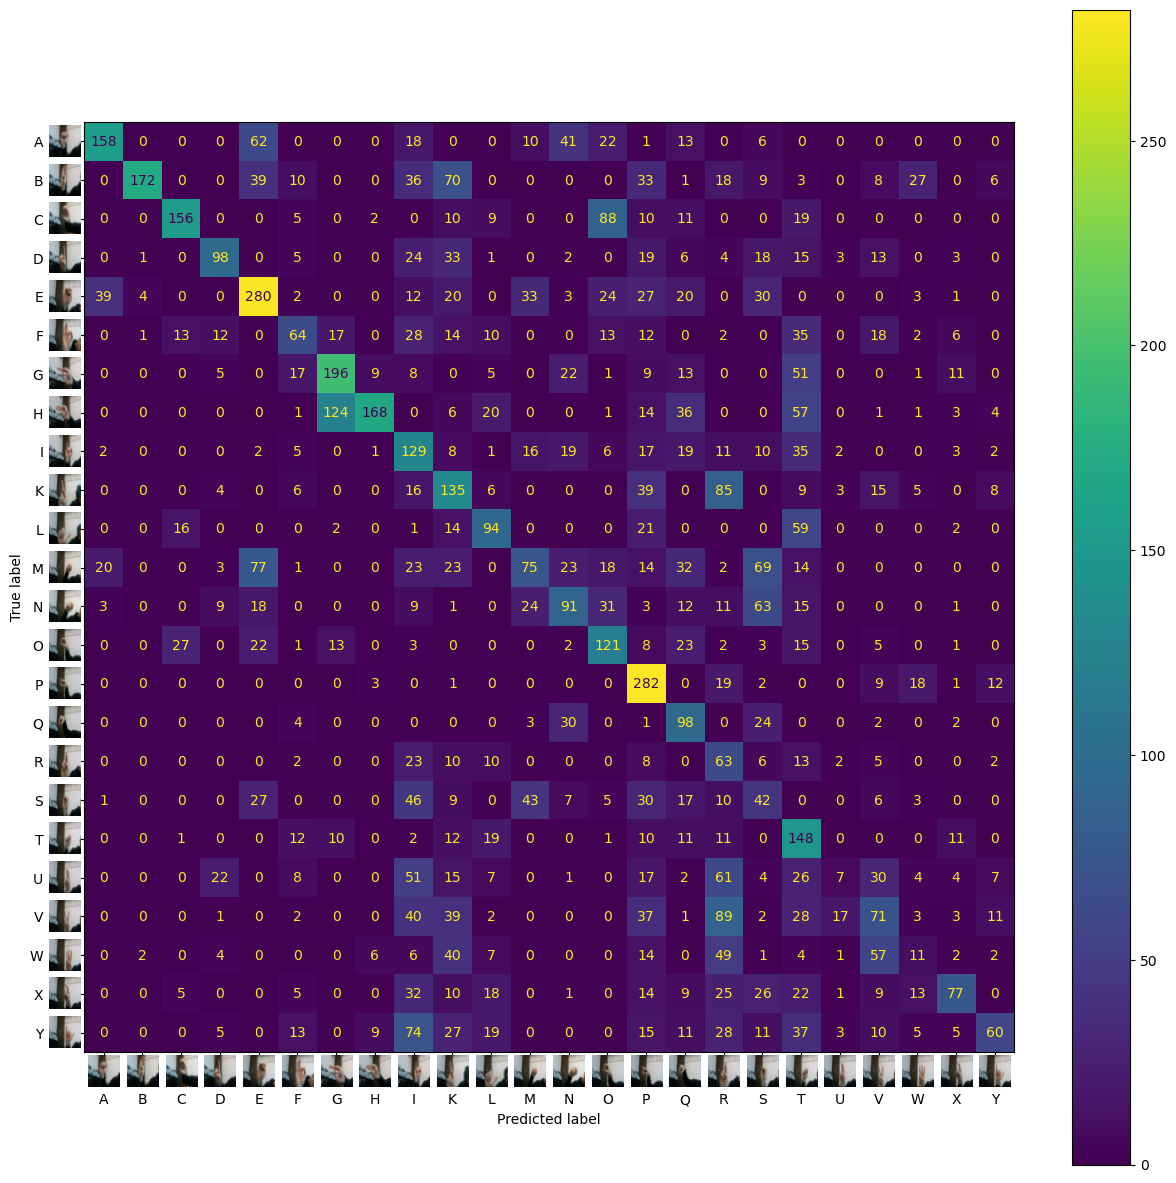

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from PIL import Image
from matplotlib.offsetbox import OffsetImage,AnnotationBbox



fig, ax = plt.subplots(figsize=(10, 10))

cm = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)

ax.tick_params(axis='x', which='major', pad=26)
ax.tick_params(axis='y', which='major', pad=26)

ASL_ticks=['A', 'B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W',"X","Y"]
# Set the x-tick labels
ax.set_xticklabels(ASL_ticks)
ax.set_yticklabels(ASL_ticks)

xtick_positions = ax.get_xticks()
ytick_positions = ax.get_yticks()

A = Image.open('C:/Users/Thibaut.GRILLET/Documents/GitHub/ProjetIA/Dev_tib/photos_asl/asl_alphabet_test_perso/A_test.jpg')
B = Image.open('C:/Users/Thibaut.GRILLET/Documents/GitHub/ProjetIA/Dev_tib/photos_asl/asl_alphabet_test_perso/B_test.jpg')
A = A.resize((28, 28))
B = B.resize((28,28))

# xy = [0.0, 0.0]


# imagebox = OffsetImage(A, zoom=0.8)
# # # ab = AnnotationBbox(imagebox,(0,23),frameon=False)
# # ab = AnnotationBbox(imagebox,(xpos, 23),
# #                     frameon=False)
# ab = AnnotationBbox(imagebox, xy,
#                     xybox=(0., 24.),
#                     pad=0.5,frameon=False)
# ax.add_artist(ab)
imagebox = OffsetImage(B, zoom=0.8)
# # ab = AnnotationBbox(imagebox,(0,23),frameon=False)
# ab = AnnotationBbox(imagebox,(xpos, 23),
#                     frameon=False)
ab = AnnotationBbox(imagebox, xy,
                    xybox=(-1., 0.),
                    pad=0.5,frameon=False)
ax.add_artist(ab)   

ajout_image_x(ASL_ticks)
ajout_image_y(ASL_ticks)


# changer la taille de la figure en utilisant la méthode set_size_inches
fig.set_size_inches(15, 15)
plt.show()

In [52]:
ASL_ticks

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

def get_flag(name):
    path = "data/flags/Flags/flags/flags/24/{}.png".format(name.title())
    im = plt.imread(path)
    return im

def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.72)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)
    

countries = ["Norway", "Spain", "Germany", "Canada", "China"]
valuesA = [20, 15, 30, 5, 26]
 

fig, ax = plt.subplots()

ax.bar(range(len(countries)), valuesA, width=0.5,align="center")
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries)
ax.tick_params(axis='x', which='major', pad=26)

for i, c in enumerate(countries):
    offset_image(i, c, ax)

plt.show()